In [2]:
from models.FoodCNN import FoodCNN
from models.EnsambleModel import EnsambleModel
import pandas as pd
from scripts.ImageDataset import ImageDataset

In [3]:
ltf = pd.read_csv('ground_truth/foods_names.csv').to_dict()['Food']

In [7]:
models_names = ['resnet18', 'efficientnet','vgg16']
models_weights = [0.32075472, 0.33692722, 0.34231806]

em = EnsambleModel(models_name=models_names, models_weights=models_weights)

Loading model:  resnet18


c:\Users\Massimo\Desktop\VisualFoodRecognitionProject\models\FoodCNN.py:205: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path))
c:\Us

Loading model:  efficientnet
Loading model:  vgg16


In [4]:
test_df = pd.read_csv('./ground_truth/my_val_info.csv', header=None, names=['image', 'label'])

test_dataset = ImageDataset(test_df, './val_set/', train=False, dataset_size=1000)

In [6]:
images_idx, image_labels, confidence = em.predict(test_dataset, lc=None)

100%|██████████| 373/373 [01:47<00:00,  3.47it/s]


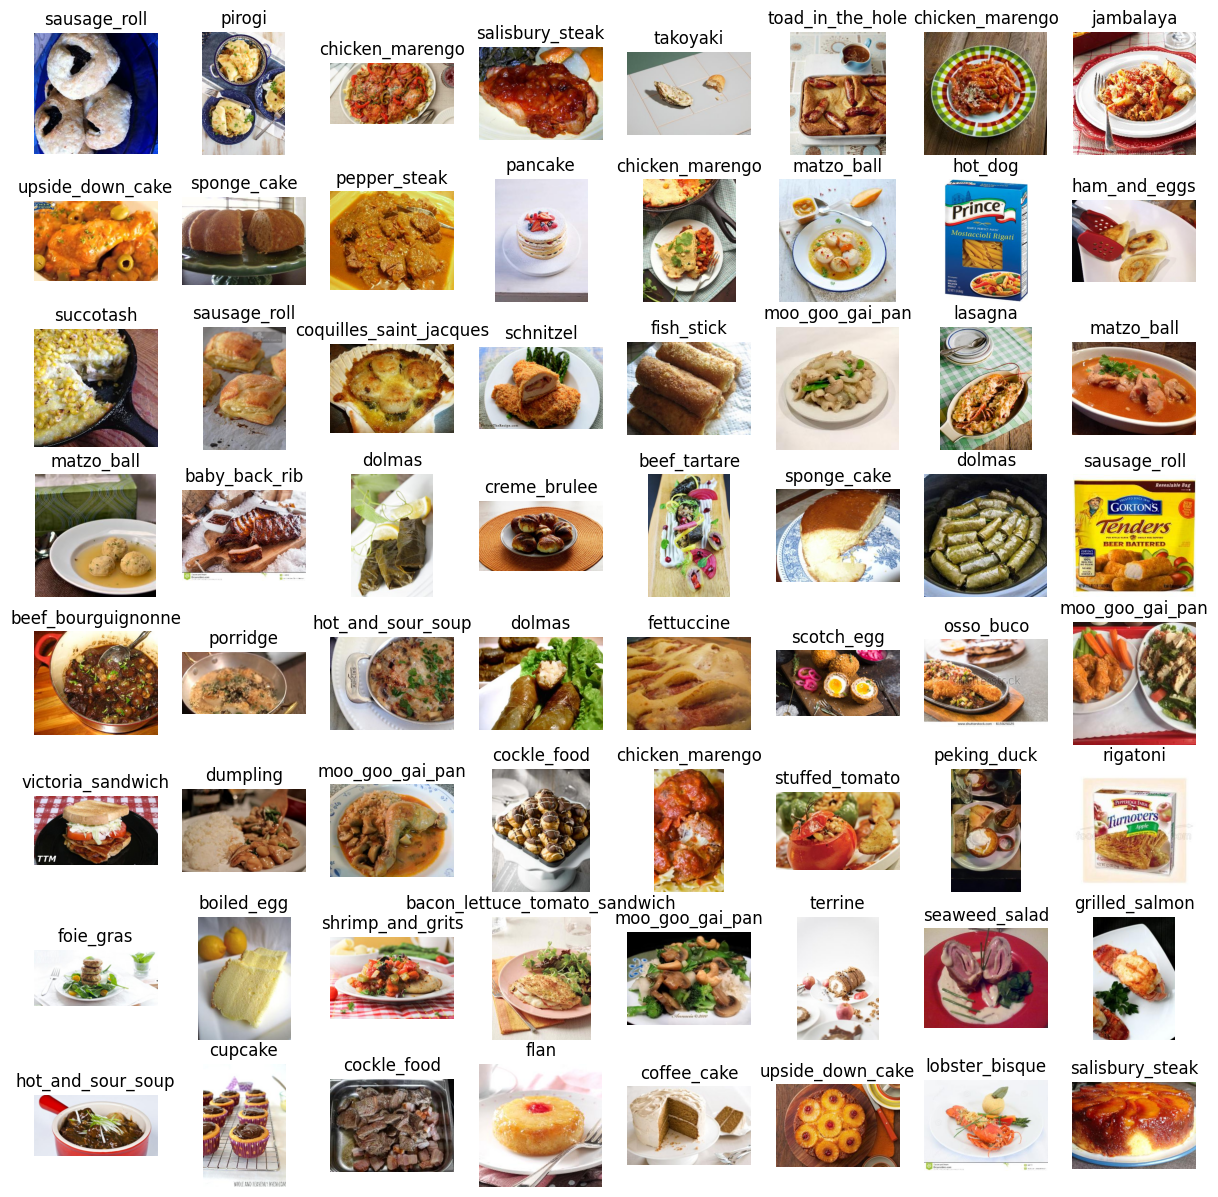

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
for i in range(64):
    im = test_dataset.get_image_by_id(images_idx[i])
    plt.subplot(8, 8, i + 1)
    plt.imshow(im)
    plt.title(ltf[image_labels[i]])
    plt.axis('off')
plt.show()

In [ ]:
good_labels = test_dataset.get_all_labels()
#good_labels = ['macaron', 'beignet', 'cruller', 'cockle_food', 'sashimi', 'seaweed_salad', 'cupcake', 'pulled_pork_sandwich', 'frittata', 'crayfish_food', 'souffle', 'deviled_egg', 'pavlova', 'fondue', 'scallop', 'applesauce', 'edamame', 'beet_salad', 'pancake', 'onion_rings', 'red_velvet_cake', 'succotash', 'fish_and_chips', 'sloppy_joe', 'gingerbread', 'strawberry_shortcake', 'poi', 'syllabub', 'miso_soup', 'fettuccine', 'flan', 'french_fries', 'donut', 'coconut_cake', 'hamburger', 'fried_egg', 'eggs_benedict', 'hot_dog', 'stuffed_peppers', 'pizza', 'sausage_roll', 'chicken_quesadilla', 'hot_and_sour_soup', 'limpet_food', 'mussel', 'waffle', 'oyster', 'lobster_bisque', 'grilled_cheese_sandwich', 'pho', 'toad_in_the_hole', 'victoria_sandwich', 'boston_cream_pie', 'fish_stick', 'scotch_egg', 'upside_down_cake', 'matzo_ball', 'moo_goo_gai_pan', 'stuffed_tomato']

KeyError: 'label'

In [20]:
import numpy as np

def get_accuracy(prediction, gt_labels, percentage=True):
    correct = 0
    for i in range(len(prediction)):
        if percentage:
            label_prediction = np.argmax(prediction[i])
        else:
            label_prediction = prediction[i]
            if label_prediction == gt_labels[i]:
                correct += 1

    return correct / len(prediction)

def get_other_accuracy(prediction, gt_labels, percentage=True):
    correct = 0
    total_good_images = 0
    for i in range(len(prediction)):
        if percentage:
            label_prediction = np.argmax(prediction[i])
        else:
            label_prediction = prediction[i]
        if gt_labels[i] in good_labels:
            total_good_images += 1
            if label_prediction == gt_labels[i]:
                correct += 1

    return correct / total_good_images

In [ ]:

print('Accuracy:', get_accuracy(image_labels, test_dataset.get_all_labels(), percentage=False))

# Dataset Deprecato

In [18]:
gt_path = './ground_truth/val_info.csv'
gt_df = pd.read_csv(gt_path, header=None, names=['image', 'label'])

deprecate_dataset = ImageDataset(gt_df, './val_set_degraded/', train=False)

restored_dataset = ImageDataset(gt_df, './val_set_degraded/', train=False, deprecated=True, dataset_size=1000)

In [8]:
dep_images_idx, dep_images_labels, dep_confidence = em.predict(deprecate_dataset, lc=None)

100%|██████████| 375/375 [02:54<00:00,  2.15it/s]


In [17]:
rest_images_idx, rest_images_labels, rest_confidence = em.predict(restored_dataset, lc=None)

100%|██████████| 373/373 [53:53<00:00,  8.67s/it]


In [23]:
print('Accuracy degraded:', get_accuracy(dep_images_labels, deprecate_dataset.get_all_labels(), percentage=False))
#print('Accuracy restored:', get_accuracy(rest_images_labels, test_dataset.get_all_labels(), percentage=False))

Accuracy degraded: 0.004419244559326274
